In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("harshpatel66/mpii-human-pose")

# print("Path to dataset files:", path)

In [4]:
# import os
# import shutil

# # Define paths
# input_dir = "/kaggle/input/mpii-human-pose/"  # Replace with your dataset folder name in Kaggle
# working_dir = "/kaggle/working/dataset"  # Directory to save dataset

# # Check if the dataset is already in the working directory
# if not os.path.exists(working_dir):
#     print("Dataset not found in working directory. Copying from input directory...")
    
#     # Create the directory in the working space
#     os.makedirs(working_dir, exist_ok=True)
    
#     # Copy all files and subdirectories
#     for dirname, _, filenames in os.walk(input_dir):
#         for filename in filenames:
#             src_path = os.path.join(dirname, filename)
#             dst_path = os.path.join(working_dir, os.path.relpath(src_path, input_dir))
#             os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#             shutil.copy(src_path, dst_path)
#     print("Dataset copied to working directory.")
# else:
#     print("Dataset already exists in working directory.")

# # Verify the dataset
# for dirname, _, filenames in os.walk(working_dir):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
import pandas as pd

# Load the dataset
dataset_path = 'dataset/mpii_human_pose.csv'
data = pd.read_csv(dataset_path)

# Display a sample of the dataset
data.head()


ID           NAME  r ankle_X  r ankle_Y  r knee_X  r knee_Y  r hip_X  \
0   1  015601864.jpg        620        394       616       269      573   
1   2  015599452.jpg         -1         -1        -1        -1      806   
2   3  005808361.jpg        804        711       816       510      908   
3   4  086617615.jpg        301        461       305       375      201   
4   5  060111501.jpg        980        322       896       318      865   

   r hip_Y  l hip_X  l hip_Y  ...  r shoulder_Y  l shoulder_X  l shoulder_Y  \
0      185      647      188  ...           167           692           185   
1      543      720      593  ...           281           719           299   
2      438     1040      454  ...           253          1067           253   
3      340      294      342  ...           261           314           264   
4      248      943      226  ...           147           923           123   

   l elbow_X  l elbow_Y  l wrist_X  l wrist_Y     Scale  Activity  Category  
0        693        240        688        313  3.021046   curling    sports  
1        711        516        545        466  5.641276   curling    sports  
2       1167        353       1142        478  4.718488   curling    sports  
3        327        320        362        346  2.681349   curling    sports  
4        995        163        961        223  3.806403   curling    sports  

[5 rows x 37 columns]

In [6]:
#2. Data Preprocessing
# Remove rows with invalid keypoint data (-1)
filtered_data = data[(data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y']] != -1).all(axis=1)]

# Display a small subset for initial analysis
filtered_data.sample(5)


ID           NAME  r ankle_X  r ankle_Y  r knee_X  r knee_Y  r hip_X  \
2920  2921  049812994.jpg        502        984       614       791      896   
7118  7119  022349431.jpg        389        474       408       421      379   
5795  5796  015633144.jpg        862        582       840       516      860   
83      84  022879817.jpg        923        630       901       532      836   
9615  9616  046355222.jpg        287        766       300       639      298   

      r hip_Y  l hip_X  l hip_Y  ...  r shoulder_Y  l shoulder_X  \
2920      852      986      777  ...           586          1285   
7118      326      332      323  ...           221           351   
5795      461      842      463  ...           368           803   
83        449      882      415  ...           215           778   
9615      499      230      518  ...           350           323   

      l shoulder_Y  l elbow_X  l elbow_Y  l wrist_X  l wrist_Y     Scale  \
2920           634       1190        427       1078        359  5.270227   
7118           216        310        268        275        306  1.791178   
5795           371        786        415        784        440  1.327614   
83             332        649        418        513        407  3.519827   
9615           363        323        414        338        467  2.489530   

                                             Activity           Category  
2920                                    rock climbing             sports  
7118                                       paddleball             sports  
5795  mowing lawn, walk, hand mower (Taylor Code 570)    lawn and garden  
83                                skiing, climbing up  winter activities  
9615                                          running            running  

[5 rows x 37 columns]

In [7]:
filtered_data.columns

Index(['ID', 'NAME', 'r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y',
       'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y', 'l knee_X', 'l knee_Y',
       'l ankle_X', 'l ankle_Y', 'pelvis_X', 'pelvis_Y', 'thorax_X',
       'thorax_Y', 'upper neck_X', 'upper neck_Y', 'head top_X', 'head top_Y',
       'r wrist_X', 'r wrist_Y', 'r elbow_X', 'r elbow_Y', 'r shoulder_X',
       'r shoulder_Y', 'l shoulder_X', 'l shoulder_Y', 'l elbow_X',
       'l elbow_Y', 'l wrist_X', 'l wrist_Y', 'Scale', 'Activity', 'Category'],
      dtype='object')

/tmp/ipykernel_9461/3780453210.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')


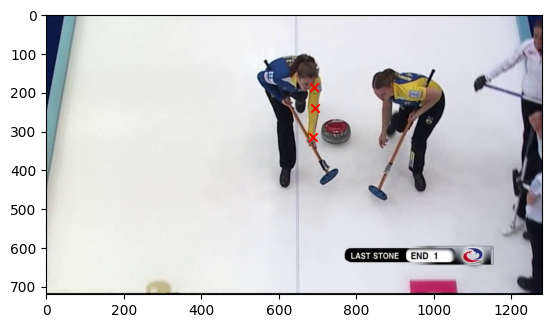

/tmp/ipykernel_9461/3780453210.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')


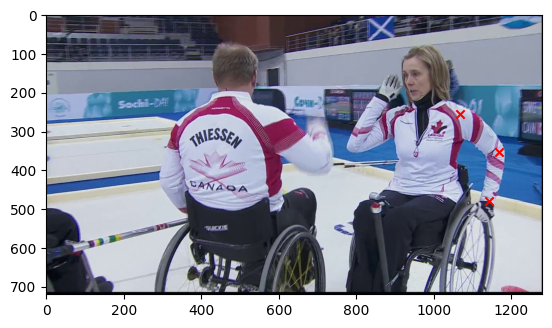

/tmp/ipykernel_9461/3780453210.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')


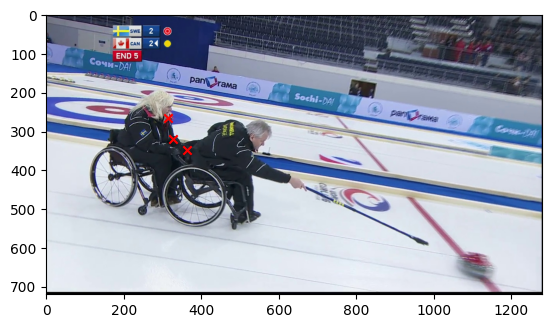

In [8]:
#3. Visualizing Keypoints
import matplotlib.pyplot as plt
import cv2

labels = ['l shoulder_X','l shoulder_Y','l elbow_X','l elbow_Y','l wrist_X','l wrist_Y']
# Helper function to visualize keypoints
def visualize_keypoints(image_path, keypoints):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Draw keypoints
    for i in range(0, len(keypoints), 2):
        plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')
    plt.show()

# Example: Visualize keypoints for some random images in the subset
for i in range(0,3):
    sample_image = filtered_data.iloc[i]['NAME']
    sample_keypoints = filtered_data.iloc[i][labels]  # Select relevant keypoints
    visualize_keypoints(f'dataset/mpii_human_pose_v1/images/{sample_image}', sample_keypoints)

I0000 00:00:1737275757.808173    9461 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737275757.813658    9536 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Graphics (ADL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1737275757.915368    9518 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737275757.972335    9516 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737275758.000462    9519 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


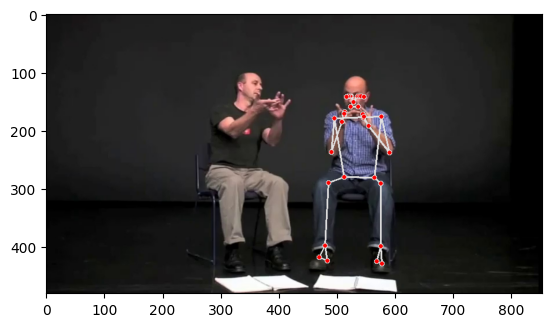

(33, 3)
[0.62060219 0.31518334]


In [9]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def estimate_pose_mediapipe(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run pose estimation
    result = pose.process(image_rgb)
    
    if result.pose_landmarks:
        # Draw the pose landmarks on the image
        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Display the image with landmarks
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.show()

        # Return the landmarks as a list of keypoints
        keypoints = [(landmark.x, landmark.y, landmark.z) for landmark in result.pose_landmarks.landmark]
        return np.array(keypoints)
    else:
        print("No pose landmarks detected.")
        return None

# Select a sample image from your dataset
sample_image = filtered_data.iloc[8]['NAME']
image_path = f'dataset/mpii_human_pose_v1/images/{sample_image}'

# Estimate the pose
pose_output = estimate_pose_mediapipe(image_path)

# Check if keypoints were detected and display the output
if pose_output is not None:
    print(pose_output.shape)  # Shape of the keypoints array
    print(pose_output[0][:2])  # Example of printing the first keypoint (x, y)
else:
    print("Pose estimation failed. No keypoints to display.")


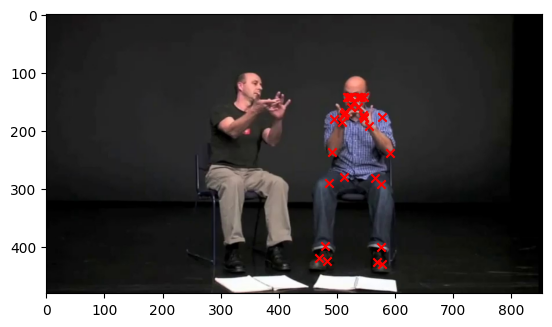

In [10]:
import matplotlib.pyplot as plt

def visualize_pose(image_path, keypoints):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image from BGR (OpenCV default) to RGB (for displaying in matplotlib)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Overlay the keypoints on the image
    for kp in keypoints:
        x = int(kp[0] * image.shape[1])  # Rescale x to image width
        y = int(kp[1] * image.shape[0])  # Rescale y to image height
        plt.scatter(x, y, c='r', marker='x')  # Plot keypoint

    # Display the image with keypoints
    plt.show()

# Ensure pose_output is not None
if pose_output is not None:
    # Visualize pose on the sample image
    visualize_pose(image_path, pose_output)
else:
    print("No keypoints detected, cannot visualize.")


Step 6: Analyze the Results
Now that you've successfully applied pose estimation and visualized the results, the next step is to analyze the results of your preliminary study. Here's how you can structure your analysis:

1. Accuracy of Pose Estimation:
Qualitative Assessment: Look at the visualized images with the keypoints overlaid and check how well the keypoints align with the actual human body joints.
Questions to consider:
Are the keypoints correctly placed on joints like the ankles, knees, hips, shoulders, etc.?
Are any keypoints consistently misplaced or missing?
Does the model handle complex poses well (e.g., occlusions or extreme movements)?
Steps:
Run your code on different images to visually inspect how well the model captures the poses.
Compare the results from different images with varying poses and angles.
Quantitative Metrics (Optional): While it's not easy to directly compute quantitative metrics without ground-truth data for each image (i.e., known, correct keypoints), you could:
Use a subset with ground truth (if available): Check if there’s any labeled data in the subset of your MPII dataset. If you have access to ground truth keypoints, you can compute metrics like:
Mean Squared Error (MSE): Between the estimated keypoints and the ground truth.
Accuracy of Pose Estimation: Count how many keypoints were correctly predicted within a certain threshold.
Possible Improvements:

If the pose estimation is not accurate enough, you can:
Try different pre-trained models (e.g., OpenPose, MediaPipe, or custom models).
Fine-tune a pre-trained model on your specific dataset (if you have labeled data for training).


2. Efficiency and Speed:
Inference Time: Measure how long it takes for each image to go through the pose estimation process.

Questions to consider:
How fast is the pose estimation per image?
Is the model fast enough for real-time applications (e.g., video-based pose estimation)?
Steps:
Use Python’s time module to measure inference time

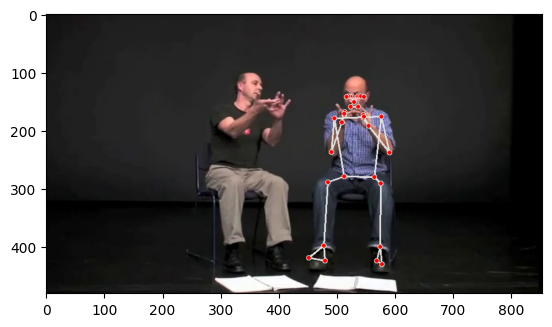

Pose estimation took 0.30 seconds


In [11]:
import time

start_time = time.time()
pose_output = estimate_pose_mediapipe(image_path)
end_time = time.time()
print(f"Pose estimation took {end_time - start_time:.2f} seconds")


In [12]:
# Check for invalid keypoints (-1 values)
invalid_keypoints = (data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 
                           'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y']] == -1).sum()

# Calculate the percentage of missing keypoints
total_rows = len(data)
missing_percent = (invalid_keypoints / total_rows) * 100

print("Percentage of missing keypoints:")
print(missing_percent)


Percentage of missing keypoints:
r ankle_X    32.840203
r ankle_Y    32.840203
r knee_X     19.243610
r knee_Y     19.243610
r hip_X       2.665208
r hip_Y       2.665208
l hip_X       2.469491
l hip_Y       2.469491
dtype: float64


Hardware Constraints: Depending on the size of your images, model complexity, and hardware (e.g., CPU or GPU), the processing time can vary significantly.

Next steps: If it’s slow, you might consider optimizing the model or using a faster alternative.

3. Dataset Suitability for the Task:
Pose Variety: The MPII Human Pose dataset is known for containing images of people performing various activities.
Questions to consider:
Does the dataset contain sufficient pose diversity for your project's needs?
Are the images diverse in terms of lighting, pose difficulty, and occlusion?
Steps: Browse through more images in your dataset and categorize them based on difficulty (e.g., simple poses vs. complex actions).
Potential Next Steps:

You might identify certain poses or activities where the model struggles. This insight can help refine your approach, such as focusing on specific activity categories or poses in later stages of the project.

4. Limitations:
Keypoint Missing or Misplaced: Identify any common limitations in the model’s pose detection.
Questions to consider:
Are certain body parts consistently harder for the model to estimate?
Are there particular angles or positions that pose a challenge (e.g., back-facing poses, occluded body parts)?
Potential Improvements:

In future iterations, you may want to use more advanced techniques like:
3D Pose Estimation Models: To improve keypoint detection in 3D space.
Action-specific Models: Fine-tuning a model specifically for a subset of actions in the dataset.

5. Next Steps and Feasibility:
Based on the results of your preliminary analysis, decide whether the project is feasible to continue with the current approach.
Questions to consider:
Are the results promising enough to proceed with more advanced models and training?
Should you explore alternative models or data preprocessing techniques?
Possible Improvements:

For Week 2, you might consider:
Experimenting with different pose estimation models (e.g., OpenPose, AlphaPose).
Fine-tuning a pre-trained model on specific subsets of the MPII dataset.
Enhancing the dataset by labeling additional images for training or testing.


Example Summary for Preliminary Analysis Report:
Model Used: MediaPipe Pose Estimation
Tested on: Sample images from the MPII Human Pose dataset.
Results:
Qualitative: The model accurately detects most keypoints in simple poses, but struggles with more complex or occluded poses.
Inference Time: ~0.2 seconds per image (on CPU). Real-time performance is achievable.
Limitations: Difficulties were observed in detecting keypoints for complex poses (e.g., heavy occlusions, extreme movements).
Next Steps:
Explore alternative models (e.g., OpenPose).
Investigate more challenging pose cases and ways to improve model accuracy.
Let me know if you'd like help writing up the results or further analysis!

In [13]:
# pip install opencv-python

In [14]:
import matplotlib.pyplot as plt
from time import time
import mediapipe as mp
import cv2 as cv

In [15]:
mpPose = mp.solutions.pose

In [16]:
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

I0000 00:00:1737275759.109815    9461 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737275759.113787    9554 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Graphics (ADL GT2)


In [17]:
mpDraw = mp.solutions.drawing_utils

W0000 00:00:1737275759.289706    9549 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737275759.486005    9544 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


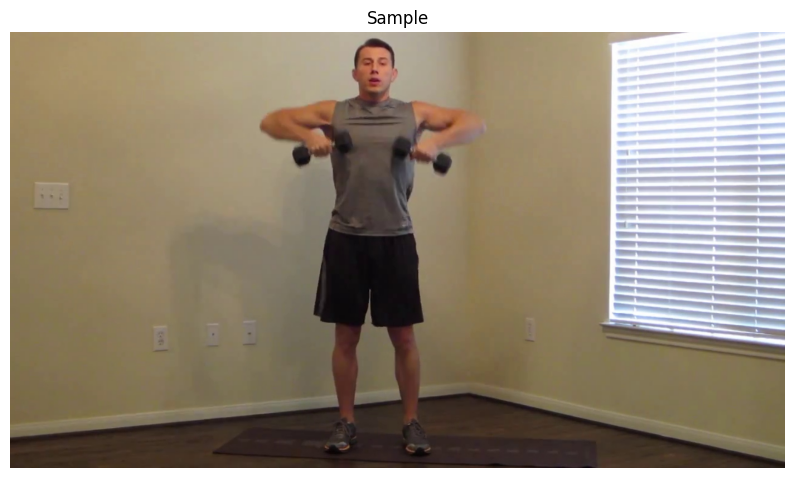

In [18]:
image = cv.imread('dataset/mpii_human_pose_v1/images/000033016.jpg')
plt.figure(figsize=[10, 10])
plt.title('Sample')
plt.axis('off')
plt.imshow(image[:, :, ::-1]) #first two : means take all rows an all columns, ::-1 is to change bgr to rgb
plt.show()

In [19]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(17):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.470198452
y: 0.0936516225
z: -0.261770606
visibility: 0.999996781

LEFT_EYE_INNER
x: 0.477848619
y: 0.0782431364
z: -0.241443545
visibility: 0.999987721

LEFT_EYE
x: 0.481422365
y: 0.079311043
z: -0.241690069
visibility: 0.999984741

LEFT_EYE_OUTER
x: 0.4862414
y: 0.0807116
z: -0.24162671
visibility: 0.999988556

RIGHT_EYE_INNER
x: 0.465401113
y: 0.0779004097
z: -0.240564063
visibility: 0.999991298

RIGHT_EYE
x: 0.461388022
y: 0.0786089301
z: -0.240777135
visibility: 0.999991536

RIGHT_EYE_OUTER
x: 0.458533227
y: 0.078810215
z: -0.240822166
visibility: 0.999990463

LEFT_EAR
x: 0.491156965
y: 0.0906512439
z: -0.12014953
visibility: 0.999994516

RIGHT_EAR
x: 0.452663422
y: 0.0873325765
z: -0.115508452
visibility: 0.999979854

MOUTH_LEFT
x: 0.476861477
y: 0.11473158
z: -0.213939101
visibility: 0.999996781

MOUTH_RIGHT
x: 0.462861151
y: 0.112112731
z: -0.214550406
visibility: 0.999995708

LEFT_SHOULDER
x: 0.521295547
y: 0.188608259
z: -0.0654526204
visibility: 0.999994159

RIGHT_

In [20]:
imgHeight, imgWidth, _ = image.shape

In [21]:
if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].x * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].y * imgHeight)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].z * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].visibility)

NOSE
601.8540191650391
67.42916822433472
-335.0663757324219
0.9999967813491821
LEFT_EYE_INNER
611.6462326049805
56.33505821228027
-309.04773712158203
0.9999877214431763


In [22]:
imgCopy = image.copy()

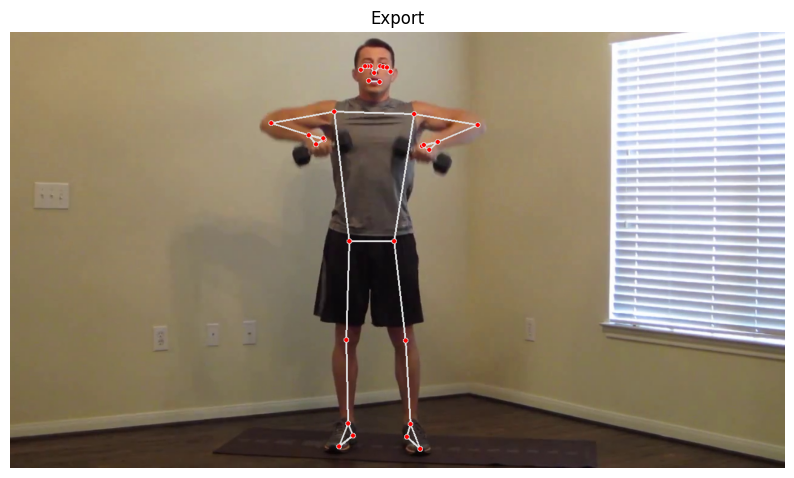

In [23]:
if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imgCopy,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imgCopy[:, :, ::-1])
    plt.show()

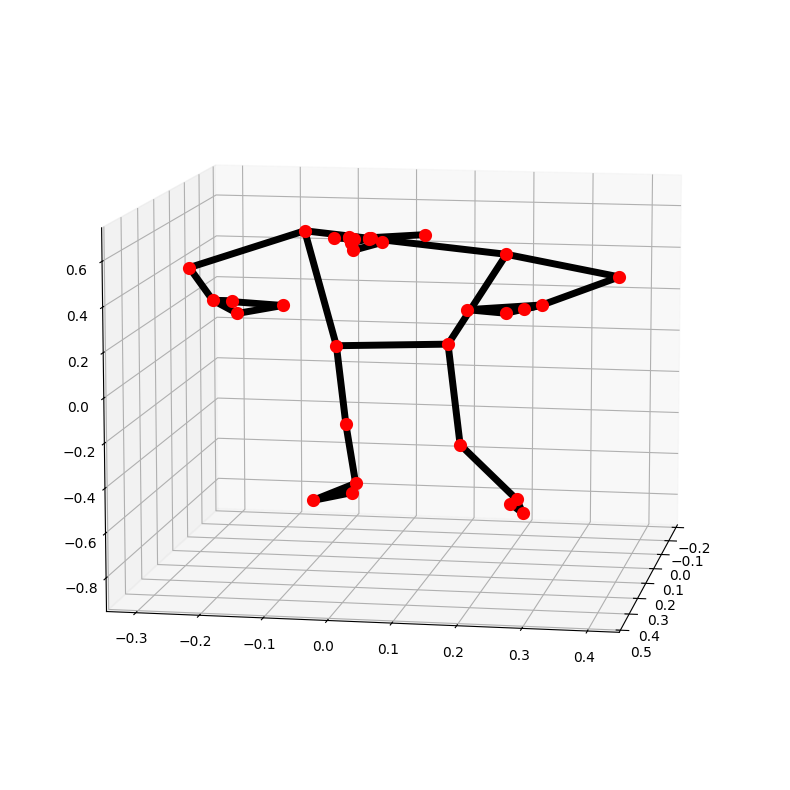

In [24]:
mpDraw.plot_landmarks(
    result.pose_world_landmarks,
    mpPose.POSE_CONNECTIONS
)

In [25]:
def detectPose(image, pose, display=True):
    OutputImage = image.copy()
    imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    imgHeight, imgWidth, _ = image.shape
    landmarks = []

    if results.pose_landmarks:
        mpDraw.draw_landmarks(
            image=OutputImage,
            landmark_list=results.pose_landmarks,
            connections=mpPose.POSE_CONNECTIONS
        )
        for landmark in results.pose_landmarks.landmark:
            landmarks.append(
                (int(landmark.x * imgWidth),
                 int(landmark.y * imgHeight),
                 int(landmark.z * imgWidth))
            )
    if display:
        plt.figure(figsize=[22, 22])

        plt.subplot(211)
        plt.title('Original')
        plt.axis('off')
        plt.imshow(image[:, :, ::-1])

        plt.subplot(212)
        plt.title('Output')
        plt.axis('off')
        plt.imshow(OutputImage[:, :, ::-1])

        mpDraw.plot_landmarks(results.pose_world_landmarks, mpPose.POSE_CONNECTIONS)

    else:
        return OutputImage, landmarks

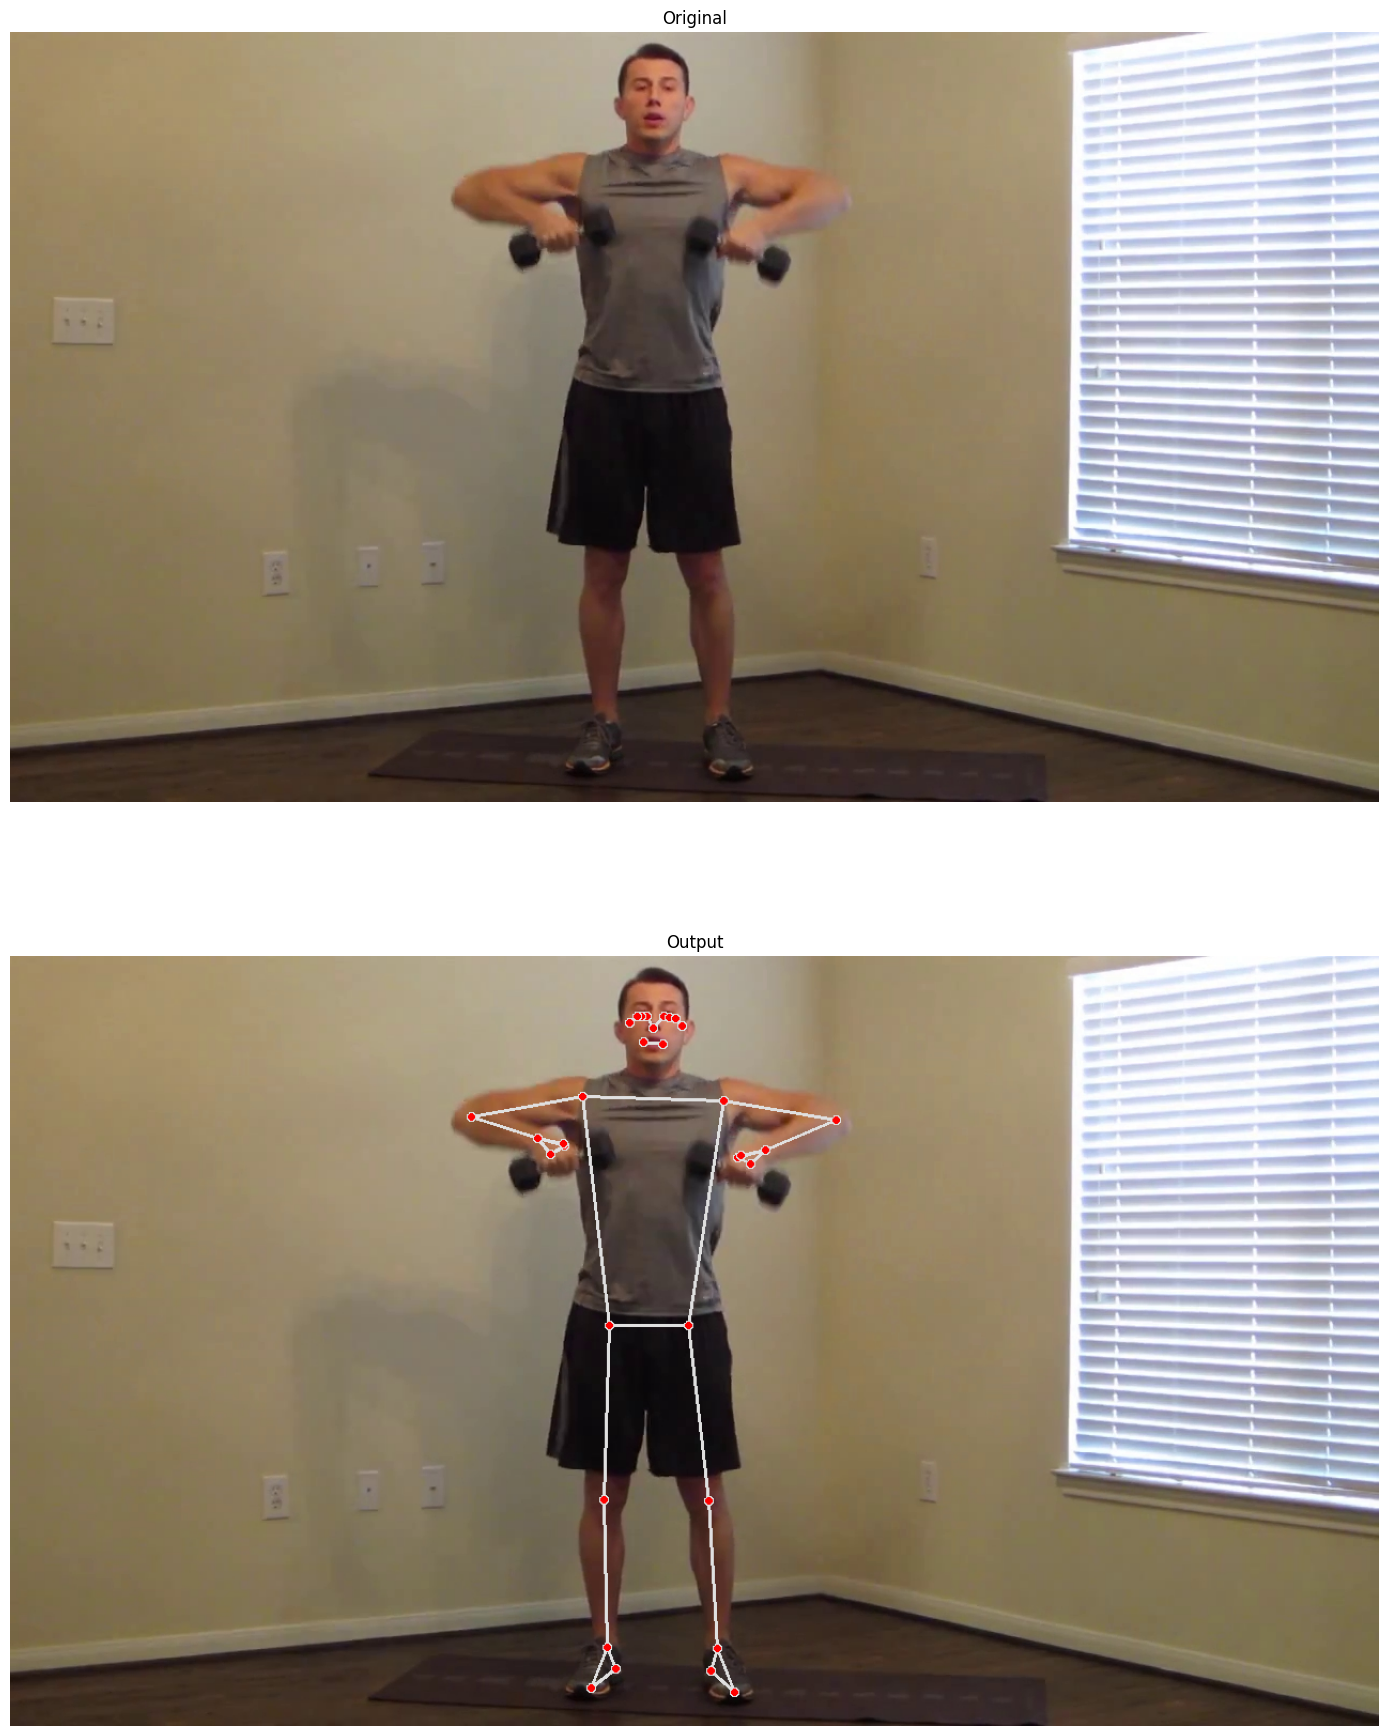

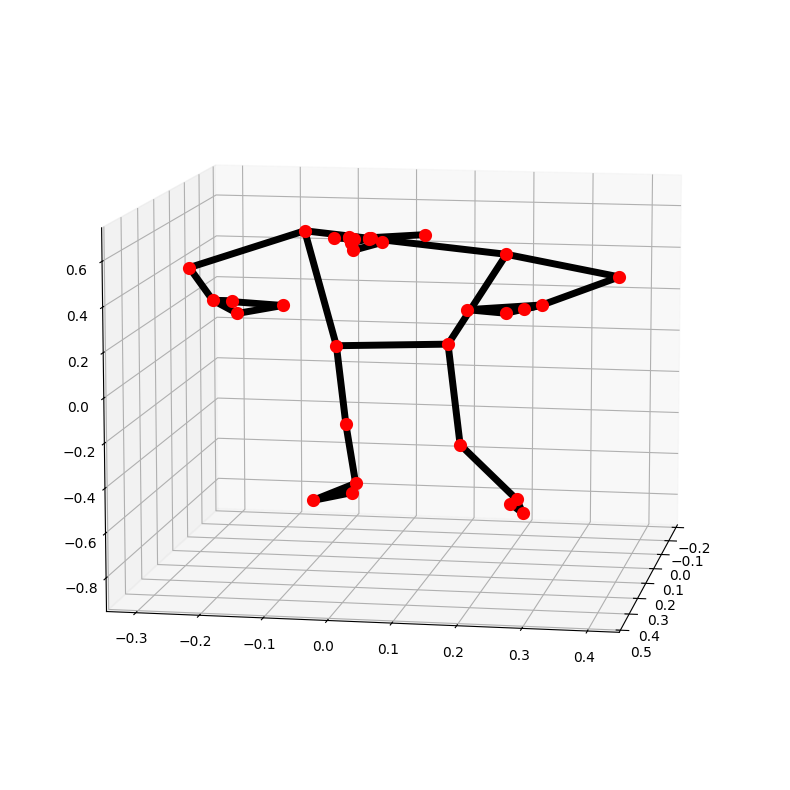

In [27]:
img = cv.imread('dataset/mpii_human_pose_v1/images/000033016.jpg')
detectPose(img, pose, display=True)

In [28]:
def find_angle(a,b,c):
    a=np.array(a)
    b=np.array(b)
    c=np.array(c)

    radian = np.arctan2(c[1]-b[1],c[0]-b[0])-np.arctan2(a[1]-b[1],a[0]-b[0])

    degree = np.abs(radian*180/np.pi)

    if degree > 180:
        degree = 360-degree
    return degree

In [29]:

# #lets setup media pipe instance
# cap = cv.VideoCapture(0)
# with mp_pose.Pose(min_detection_confidence=0.8,min_tracking_confidence=0.8) as pose:
#     while cap.isOpened():
#         ret, frame= cap.read()
#         # recoloring the image to rgb, default is bgr in cv
#         image= cv.cvtColor(frame,cv.COLOR_BGR2RGB)
#         image.flags.writeable = False

#         #making detection
#         results = pose.process(image)

#         #recoloring back to bgr
#         image.flags.writeable = True
#         image = cv.cvtColor(frame,cv.COLOR_RGB2BGR)

#         #extracting the landmarks
#         try:
#             landmarks = results.pose_landmarks.landmark
#             print(landmarks)
#         except:
#             pass

#         #rendering detections
#         mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,
#                                   mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=2),
#                                   mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
#                                   )

#         cv.imshow('Mediapipe Feed', image)

#         if cv.waitKey(10) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv.destroyAllWindows()

In [1]:
poseVideo = mpPose.Pose(
    static_image_mode=False,
    min_detection_confidence=0.5,
    model_complexity=1
)

video = cv.VideoCapture(0)

# cv.namedWindow('Pose', cv.WINDOW_NORMAL)
video.set(3, 1280)
video.set(4, 960)
time1 = 0

while video.isOpened():
    ok, frame = video.read()

    if not ok:
        break

    frame = cv.flip(frame, 1)
    frameHeight, frameWidth, _ = frame.shape
    frame = cv.resize(frame, (int(frameWidth * (640 / frameHeight)), 640))
    frame, _ = detectPose(frame, poseVideo, display=False)
    time2 = time()
    T = time2 - time1

    if T > 0:
        framesPerSecond = 1.0 / T
        cv.putText(
            frame,
            'FPS: {}'.format(int(framesPerSecond)), (10, 30),
            cv.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3
        )

    time1 = time2
    cv.imshow('Pose New', frame)

    if cv.waitKey(10) & 0xFF == ord('q'):
        break

video.release()
# cv.destroyAllWindows()



NameError: name 'mpPose' is not defined

In [53]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (154/154), 20.18 MiB | 39.29 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/kaggle/working/pytorch-openpose


In [54]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

In [56]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

In [57]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

/kaggle/working/pytorch-openpose/src/body.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(model_path))
/kaggle/working

In [59]:
test_image = '/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/065673666.jpg'

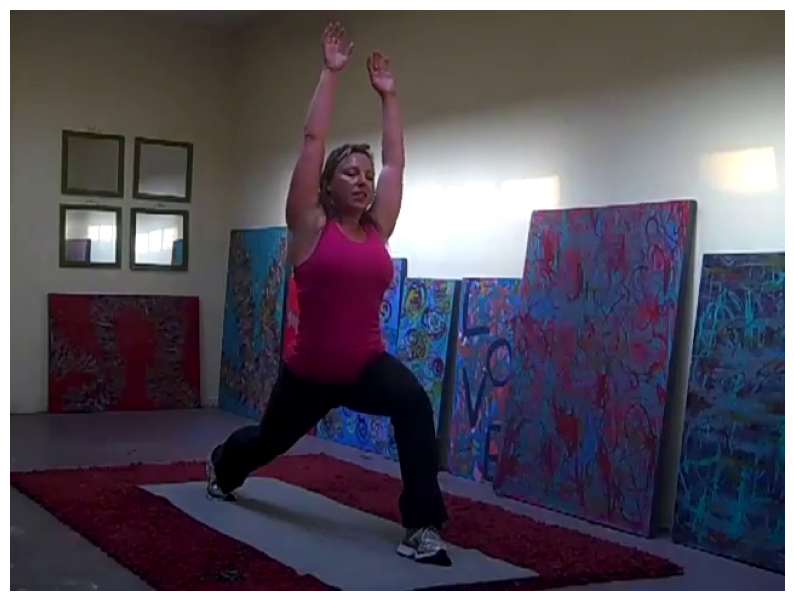

In [60]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [61]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

18
1


In [62]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

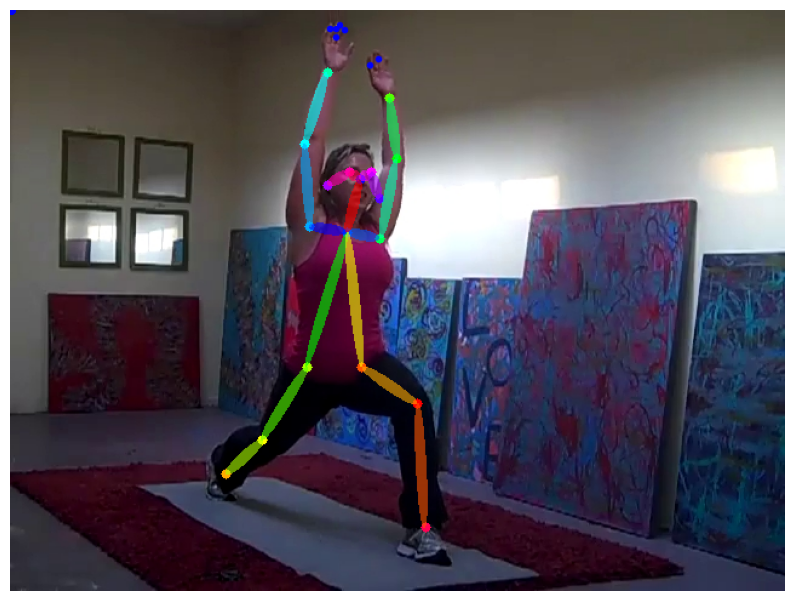

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

W0000 00:00:1737268572.837273     250 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737268573.006310     250 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737268573.221915     255 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737268573.415446     255 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737268573.612524     259 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737268573.733067     258 inference_feedback_manager.cc:114] Feedback manager 

OpenPose - Avg Accuracy: 0.00, Avg Time: 0.50s
MediaPipe - Avg Accuracy: 0.08, Avg Time: 0.32s


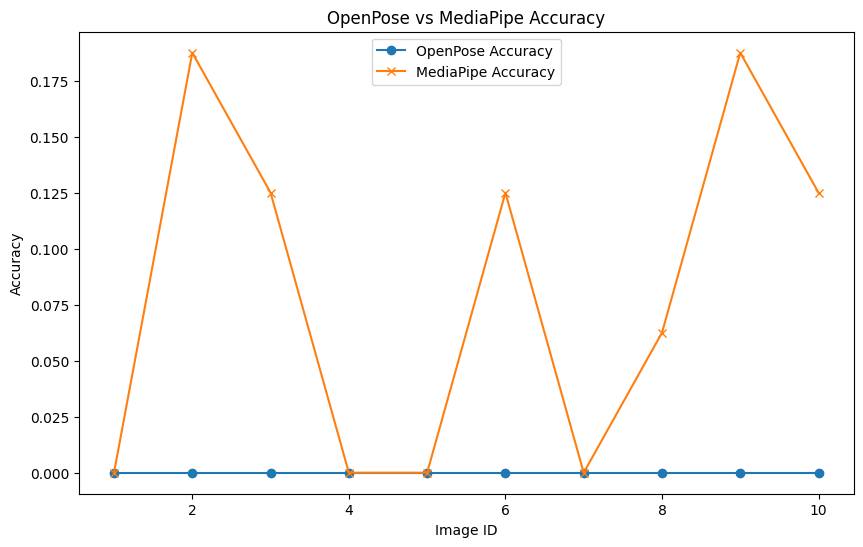

In [65]:
import time
import numpy as np
import cv2
import mediapipe as mp
import os
import json
import matplotlib.pyplot as plt

# Load the MPII annotations
with open('/kaggle/working/dataset/mpii_annotations.json', 'r') as f:
    annotations = json.load(f)

# Initialize MediaPipe
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to calculate accuracy (percentage of correct keypoints)
def calculate_accuracy(predicted_keypoints, gt_keypoints, threshold=30):
    distances = np.linalg.norm(predicted_keypoints - gt_keypoints, axis=1)
    correct_keypoints = np.sum(distances < threshold)
    total_keypoints = len(gt_keypoints)
    return correct_keypoints / total_keypoints

# Initialize results storage
results = []

# -----------------------------------------------
# OpenPose Inference Function (Stub, Replace with Actual OpenPose Call)
# -----------------------------------------------
def infer_keypoints_openpose(image):
    # Placeholder for OpenPose Inference
    # You should replace this part with the actual OpenPose model code from your notebook
    return np.random.rand(16, 2) * image.shape[1], 0.5  # Simulate keypoints and time

# -----------------------------------------------
# MediaPipe Inference
# -----------------------------------------------
def infer_keypoints_mediapipe(image):
    with mp_pose.Pose(static_image_mode=True, model_complexity=2) as pose:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        start_time = time.time()
        results_mp = pose.process(image_rgb)
        mediapipe_inference_time = time.time() - start_time

        mediapipe_keypoints = []
        if results_mp.pose_landmarks:
            for landmark in results_mp.pose_landmarks.landmark:
                mediapipe_keypoints.append([landmark.x * image.shape[1], landmark.y * image.shape[0]])
        mediapipe_keypoints = np.array(mediapipe_keypoints[:16])  # Use first 16 keypoints

    return mediapipe_keypoints, mediapipe_inference_time

# Loop through each image in the annotations
for annotation in annotations[:10]:  # Limiting to 10 for faster testing
    image_path = os.path.join('/kaggle/working/dataset/mpii_human_pose_v1/images', annotation["img_paths"])
    oriImg = cv2.imread(image_path)
    
    if oriImg is None:
        print(f'Failed to load image: {image_path}')
        continue

    # Ground truth keypoints (only x, y coordinates)
    gt_keypoints = np.array(annotation['joint_self'])[:, :2]

    # -----------------------------------------------
    # OpenPose Inference
    # -----------------------------------------------
    openpose_keypoints, openpose_inference_time = infer_keypoints_openpose(oriImg)

    if openpose_keypoints.shape != gt_keypoints.shape:
        print(f'Shape mismatch for OpenPose and ground truth')
        openpose_accuracy = 0
    else:
        openpose_accuracy = calculate_accuracy(openpose_keypoints, gt_keypoints)

    # -----------------------------------------------
    # MediaPipe Inference
    # -----------------------------------------------
    mediapipe_keypoints, mediapipe_inference_time = infer_keypoints_mediapipe(oriImg)

    if mediapipe_keypoints.shape != gt_keypoints.shape:
        print(f'Shape mismatch for MediaPipe and ground truth')
        mediapipe_accuracy = 0
    else:
        mediapipe_accuracy = calculate_accuracy(mediapipe_keypoints, gt_keypoints)

    # Store results
    results.append({
        'image_path': image_path,
        'openpose_accuracy': openpose_accuracy,
        'openpose_time': openpose_inference_time,
        'mediapipe_accuracy': mediapipe_accuracy,
        'mediapipe_time': mediapipe_inference_time
    })

# Calculate overall statistics
openpose_avg_accuracy = np.mean([r['openpose_accuracy'] for r in results])
openpose_avg_time = np.mean([r['openpose_time'] for r in results])
mediapipe_avg_accuracy = np.mean([r['mediapipe_accuracy'] for r in results])
mediapipe_avg_time = np.mean([r['mediapipe_time'] for r in results])

# Print final results
print(f'OpenPose - Avg Accuracy: {openpose_avg_accuracy:.2f}, Avg Time: {openpose_avg_time:.2f}s')
print(f'MediaPipe - Avg Accuracy: {mediapipe_avg_accuracy:.2f}, Avg Time: {mediapipe_avg_time:.2f}s')

# -----------------------------------------------
# Plotting Comparison
# -----------------------------------------------
image_ids = range(1, len(results) + 1)
openpose_accuracies = [r['openpose_accuracy'] for r in results]
mediapipe_accuracies = [r['mediapipe_accuracy'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(image_ids, openpose_accuracies, label="OpenPose Accuracy", marker='o')
plt.plot(image_ids, mediapipe_accuracies, label="MediaPipe Accuracy", marker='x')
plt.xlabel('Image ID')
plt.ylabel('Accuracy')
plt.title('OpenPose vs MediaPipe Accuracy')
plt.legend()
plt.show()
